In [44]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot, autocorrelation_plot
%run ../src/models/section_series.py
%run ../src/models/section_series.py
%matplotlib inline

In [18]:
series_loader = SectionSeriesLoader(
    img_shape=(200, 200),
    SRC_PATH='../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/*.npz')

In [19]:
%%time
haiti_series = series_loader.load({'lat':18.53,'lng':-72.34})

Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F101993.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F121994.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F121995.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F121996.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F141997.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F141998.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F141999.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F142000.v4b_web.stable_lights.avg_vis.tif.npz
Loading 

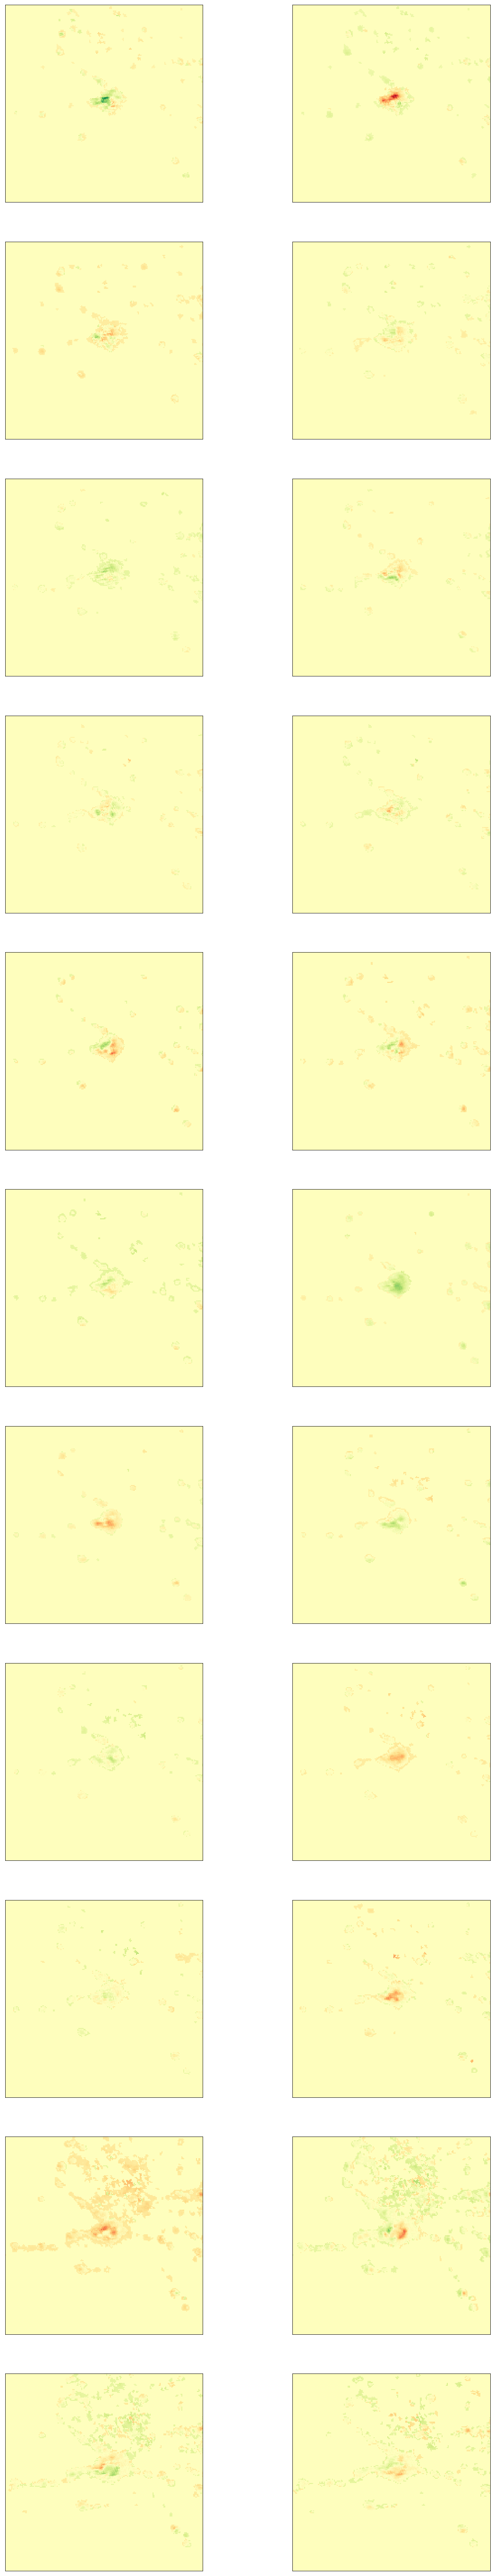

In [34]:
def plot_series(series):
    max_abs = max(abs(series.max()), abs(series.min()))
    fig, ax = plt.subplots(11,2,figsize=(20,100))
    for i, axi in enumerate(ax.flat):
        axi.imshow(series[i], vmin=-max_abs, vmax=max_abs, cmap='RdYlGn')
        axi.set(xticks=[], yticks=[])

    plt.show()
plot_series(haiti_series)

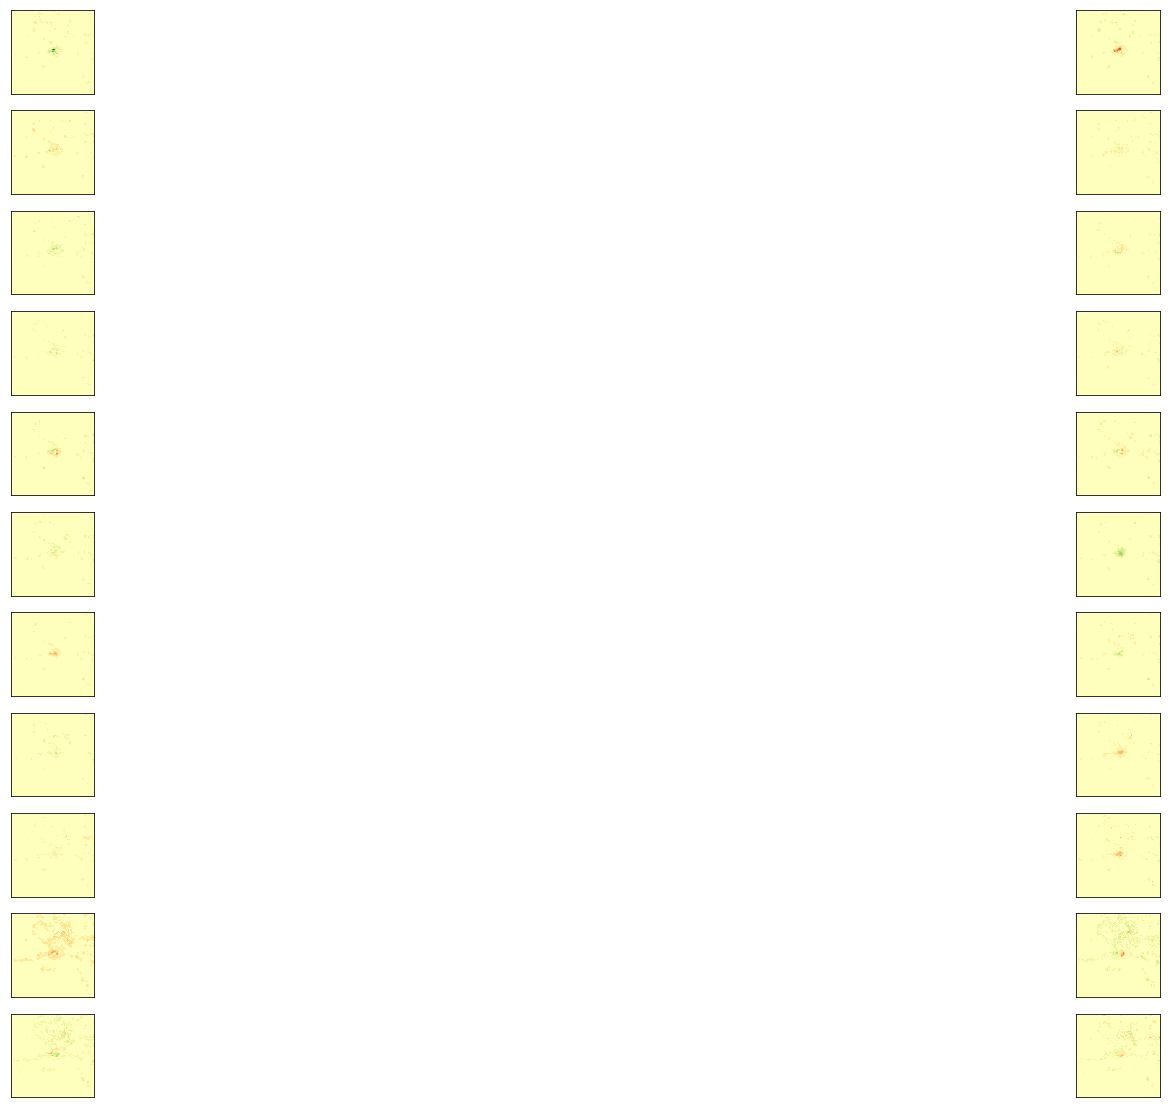

In [22]:
haiti_series_means = haiti_series.mean(axis=(1,2))
haiti_series_means

array([  3.05000000e-03,  -4.42500000e-03,  -1.33050000e-01,
        -2.05000000e-03,   9.91500000e-02,  -1.45000000e-02,
        -1.47250000e-02,   1.70000000e-02,  -4.74000000e-02,
        -1.00700000e-01,   9.75250000e-02,   7.52000000e-02,
        -6.26500000e-02,   3.50000000e-04,   5.96750000e-02,
        -1.30250000e-01,  -1.50000000e-04,  -7.87500000e-02,
        -6.90850000e-01,   1.82125000e-01,   8.46250000e-02,
         3.50750000e-02])

In [51]:
df_haiti_series = pd.DataFrame({
    'mean_change': haiti_series_means
}, index=range(1992,2014))
df_haiti_series.head()

,mean_change
1992,0.003050
1993,-0.004425
1994,-0.133050
1995,-0.002050
1996,0.099150


In [54]:
lag_plot(df_haiti_series['mean_change'])
plt.show()
autocorrelation_plot(df_haiti_series['mean_change'])
plt.show()
plt.plot(df_haiti_series['mean_change'])
plt.axvline(x=2010, 'r')
plt.show()
None

SyntaxError: non-keyword arg after keyword arg (<ipython-input-54-fdaf3512205f>, line 6)